In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# 1. Regresión Lineal



## Ejercicio 1: Predicción de precios de viviendas

Dado un dataset con:

- m² construidos
- número de habitaciones
- antigüedad de la vivienda
- precio
### Tareas:

1. Normalizar los datos.
2. Dividir en entrenamiento y prueba.
3. Ajustar un modelo de regresión lineal múltiple.
4. Graficar valor real vs valor predicho.
5. Calcular RMSE y MAE.
6. Interpretar los coeficientes.

In [3]:
df_vivienda = pd.read_csv('Datasets/dataset_regresion_lineal.csv')
df_vivienda.head()

,m2_construidos,habitaciones,antiguedad,precio
0,80,3,10,55000
1,120,4,5,90000
2,60,2,20,40000
3,150,4,7,110000
4,200,5,3,150000


In [ ]:
# 2 Primero se dividen los datos, para evitar el data leakage
X = df_vivienda.drop('precio', axis=1)
y = df_vivienda['precio'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1 Normalización Min-Max
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)


In [ ]:
# 3 Entrenamiento del Modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train_scaler, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


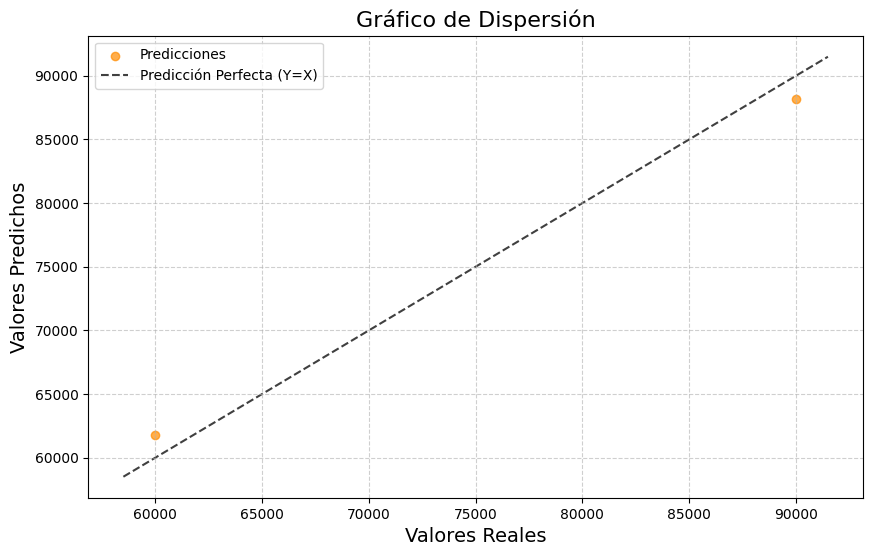

In [ ]:
# 4 Calcular el valor real vs el predicho
y_pred = model.predict(X_test_scaler)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='darkorange', label='Predicciones')
lims = [
    np.min([plt.xlim(), plt.ylim()]), 
    np.max([plt.xlim(), plt.ylim()]), 
]
plt.plot(lims, lims, 'k--', alpha=0.75, zorder=0, label='Predicción Perfecta (Y=X)')
plt.xlabel("Valores Reales", fontsize=14)
plt.ylabel("Valores Predichos", fontsize=14)
plt.title("Gráfico de Dispersión", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [ ]:
#5 Calcular el RMS y MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2_score = model.score(X_test_scaler, y_test)
print(f"R2 Score: {r2_score}")
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')



R2 Score: 0.9855477435250285
RMSE: 1803.2630720082377
MAE: 1802.325581395351


In [ ]:
feature_names = X_train.columns

# Rangos y minimos calculados sobre X_train
ranges = X_train.max() - X_train.min()
mins = X_train.min()

# coef_ del modelo corresponde a las variables escaladas
coef_scaled = model.coef_
coef_original = model.coef_ / scaler.data_range_

print("\nCoeficientes en unidades originales:")
for name, c in zip(feature_names, coef_original):
    print(f"  {name:20s}: {c:,.2f}  (por unidad de {name})")



Coeficientes en unidades originales:
  m2_construidos      : 883.72  (por unidad de m2_construidos)
  habitaciones        : -10,000.00  (por unidad de habitaciones)
  antiguedad          : -988.37  (por unidad de antiguedad)


Estos coeficientes nos dicen que:
- M2 construidos. Su valor es Positivo y mucho mayor que los otros, indica que es el tamaño del terreno es el factor mas decisivo en el precio.
- Habitaciones. Su valor es negativo. esto indica que si los valores de M2 y antiguedad se mantienen constantes la variable habitaciones tiene una relacion negativa en el precio.
- Antiguedad. Su valor es negativo. Es el factor menos influyente, a mayor antiguedad , menor el precio.

## Ejercicio 2: Tendencia de ventas

Dataset mensual de ventas de una tienda (ventas, publicidad, visitas al sitio web).
Tareas:
- Identificar correlaciones.
- Entrenar un modelo lineal para predecir ventas.
- Evaluar el desempeño usando R².
- Explicar “qué variable influye más”.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df_tienda = pd.read_csv('Datasets/ventas_tienda.csv')
df_tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              120 non-null    object 
 1   publicidad         120 non-null    float64
 2   visitas_sitio_web  120 non-null    int64  
 3   ventas             120 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.9+ KB


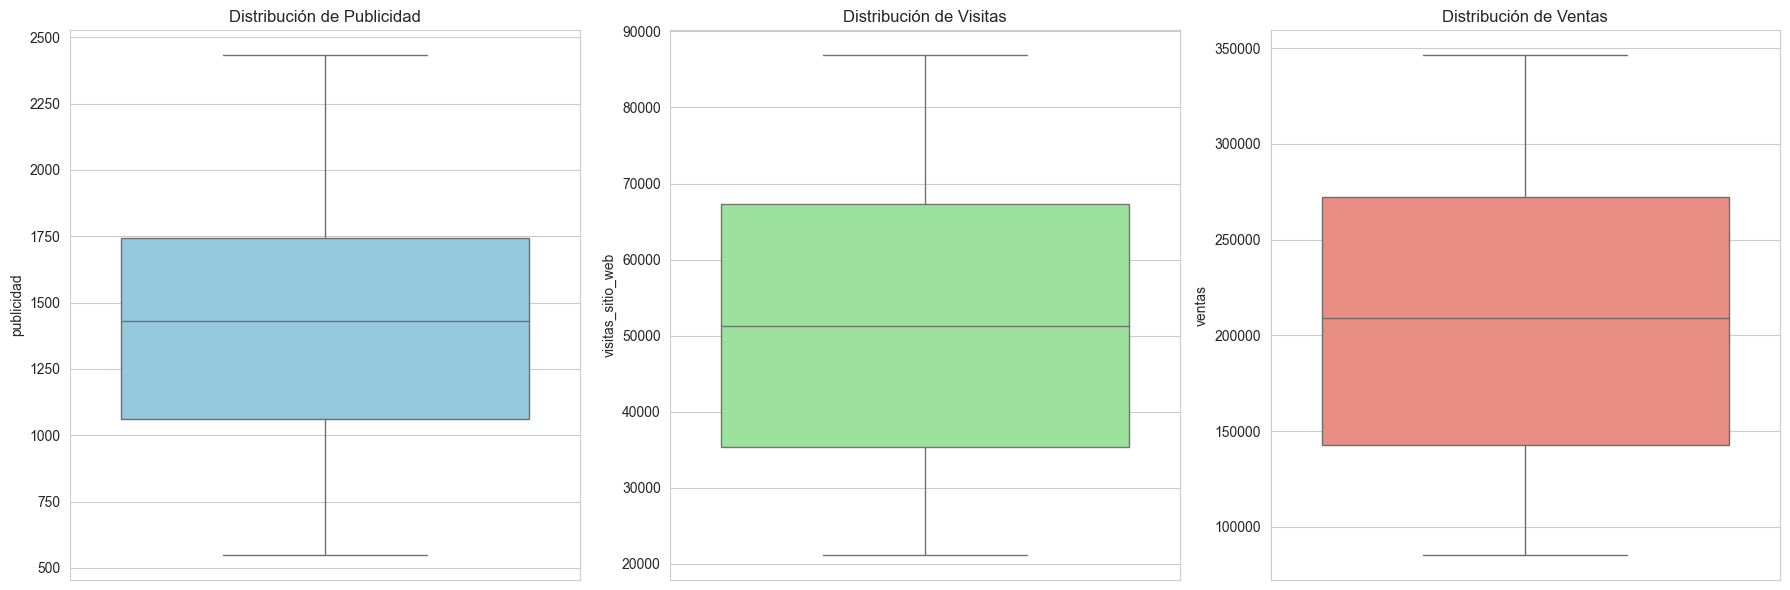

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.boxplot(y=df_tienda['publicidad'], ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Publicidad')

sns.boxplot(y=df_tienda['visitas_sitio_web'], ax=axes[1], color='lightgreen')
axes[1].set_title('Distribución de Visitas')

sns.boxplot(y=df_tienda['ventas'], ax=axes[2], color='salmon')
axes[2].set_title('Distribución de Ventas')
plt.tight_layout()
plt.show()

In [21]:
X = df_tienda[['publicidad', 'visitas_sitio_web']]
y = df_tienda['ventas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)
print("Score R2:", modelo.score(X_test_scaled, y_test))

Score R2: 0.9945040588134544


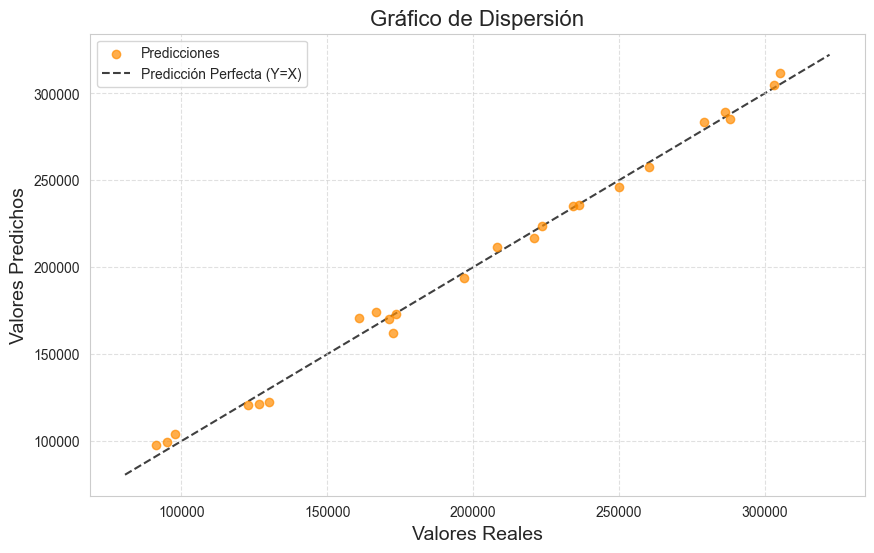

In [ ]:
y_pred = modelo.predict(X_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='darkorange', label='Predicciones')
lims = [
    np.min([plt.xlim(), plt.ylim()]),  
    np.max([plt.xlim(), plt.ylim()]),  
]
plt.plot(lims, lims, 'k--', alpha=0.75, zorder=0, label='Predicción Perfecta (Y=X)')
plt.xlabel("Valores Reales", fontsize=14)
plt.ylabel("Valores Predichos", fontsize=14)
plt.title("Gráfico de Dispersión", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2_score = modelo.score(X_test_scaled, y_test)
print(f"R2 Score: {r2_score}")
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

R2 Score: 0.9945040588134544
RMSE: 4958.888975845762
MAE: 4070.2830349589312


In [ ]:
feature_names = X_train.columns

ranges = X_train.max() - X_train.min()
mins = X_train.min()


coef_scaled = modelo.coef_
coef_original = modelo.coef_ / scaler.data_range_

print("\nCoeficientes en unidades originales:")
for name, c in zip(feature_names, coef_original):
    print(f"  {name:20s}: {c:,.2f}  (por unidad de {name})")


Coeficientes en unidades originales:
  publicidad          : -0.85  (por unidad de publicidad)
  visitas_sitio_web   : 4.02  (por unidad de visitas_sitio_web)


La variable que mas influye es las visitas al sitio web, por cada visita el valor aproximado de venta es 4.02, mientras que por publicidad es ligeramente negativa, nos indica que para este dataset, la publicidad no sirvio de mucho

# 2. Regresión Logística

## Ejercicio 3: Clasificación de correos (spam/no spam)

Dataset con características básicas (número de enlaces, porcentaje de mayúsculas, presencia de palabras clave).

Tareas:
- Preprocesar el texto (tokenización simple).
- Entrenar la regresión logística.
- Generar matriz de confusión.
- Calcular precisión, recall y F1.
- Interpretar los pesos de cada característica.

In [ ]:

df_spam = pd.read_csv('Datasets/dataset_spam.csv')
df_spam.head()

,num_enlaces,mayusculas_pct,palabras_spam,es_spam
0,1,5,0,0
1,5,40,5,1
2,0,2,0,0
3,7,60,8,1
4,3,30,2,1


In [ ]:

X = df_spam.drop('es_spam', axis=1)
y = df_spam['es_spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_spam = LogisticRegression()
model_spam.fit(X_train_scaled, y_train)


preds = model_spam.predict(X_test_scaled)
print("Predicción:", preds)
print("Accuracy:", accuracy_score(y_test, preds))


Predicción: [1 0]
Accuracy: 1.0


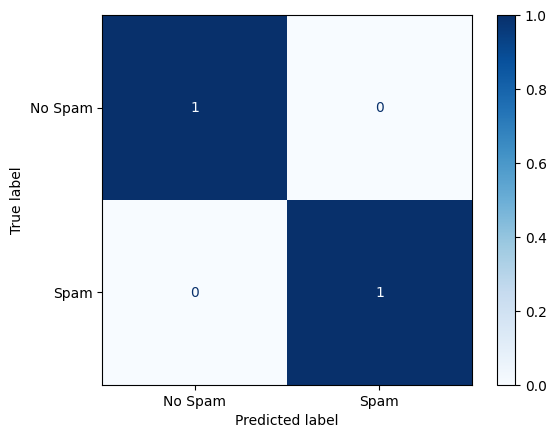

In [21]:
y_pred_spam = model_spam.predict(X_test_scaled)
conf_spam = confusion_matrix(y_test, y_pred_spam)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_spam, display_labels=['No Spam', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [23]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



   Característica  Peso (Importancia)
0     num_enlaces            0.681196
1  mayusculas_pct            0.658331
2   palabras_spam            0.541117


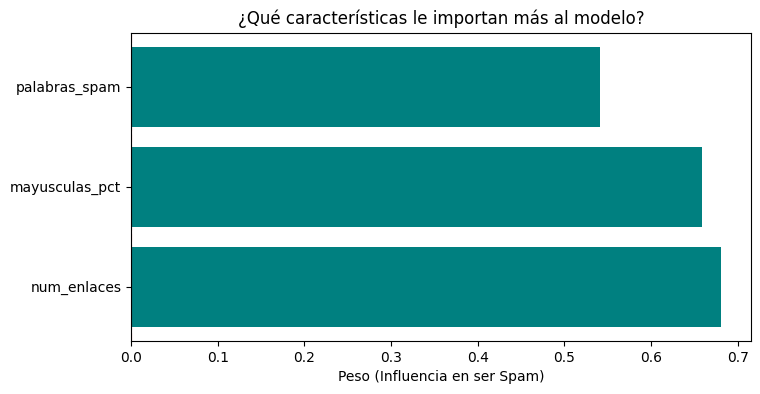

In [ ]:
pesos = model_spam.coef_[0]
nombres_columnas = X.columns

df_pesos = pd.DataFrame({'Característica': nombres_columnas, 'Peso (Importancia)': pesos})


df_pesos = df_pesos.sort_values(by='Peso (Importancia)', ascending=False)

print(df_pesos)


plt.figure(figsize=(8, 4))
plt.barh(df_pesos['Característica'], df_pesos['Peso (Importancia)'], color='teal')
plt.xlabel("Peso (Influencia en ser Spam)")
plt.title("¿Qué características le importan más al modelo?")
plt.axvline(x=0, color='red', linestyle='--') 
plt.show()

Al analizar los coeficientes de la Regresion Logistica, observamos que todas las variables presentan una correlacion positiva con la clase Spam.
La caracteristica mas determinante es num_enlaces con 0.68. Esto indica que la presencia de multiples enlaces es la caracteristica mas fuerte para clasificar un correo como spam en este dataset.
Como segunda caracteristica mas determinante tenemos mayusculas_pct. Esto indica que un uso excesivo de mayusculas es un indicador de que el correo es spam en este dataset.
Como ultima caracteristica determinante tenemos a palabras_spam, tiene poca influencia comparada con las otras al momento de detectar si el correo es spam en este dataset.

## Ejercicio 4: Diagnóstico médico binario

Dataset con variables:

- glucosa
- presión arterial
- IMC
- edad
- resultado (0 = no diabético, 1 = diabético)
Tareas:

1. Balancear clases (undersampling/oversampling).
2. Entrenar regresión logística.
3. Dibujar curva ROC y calcular AUC.
4. Evaluar impacto del umbral de clasificación.

In [3]:
from imblearn.over_sampling import SMOTE
df_diabetes = pd.read_csv('Datasets/dataset_regresion_logistica.csv')
df_diabetes.head()

,glucosa,presion,IMC,edad,diabetico
0,85,70,22,25,0
1,140,90,31,50,1
2,95,85,25,35,0
3,130,88,29,45,1
4,160,95,34,60,1


In [ ]:
X = df_diabetes.drop('diabetico', axis=1)
y = df_diabetes['diabetico']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

model_diabetico = LogisticRegression()
model_diabetico.fit(X_train_scaled, y_train_resampled)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
X_train_resampled.head(10)

,glucosa,presion,IMC,edad
0,85,70,22,25
1,180,100,36,65
2,95,85,25,35
3,160,95,34,60
4,130,88,29,45
5,120,86,28,38


El valor del AUC es: 1.0000


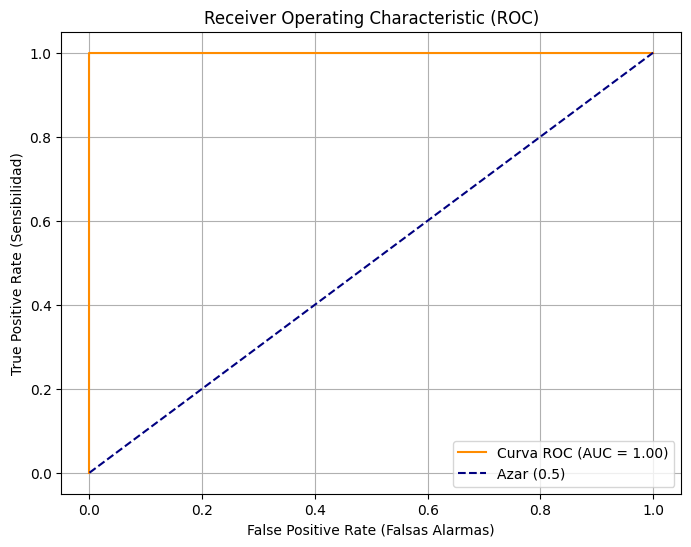

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = model_diabetico.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc = roc_auc_score(y_test, y_probs)
print(f"El valor del AUC es: {auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Azar (0.5)') 
plt.xlabel('False Positive Rate (Falsas Alarmas)')
plt.ylabel('True Positive Rate (Sensibilidad)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
umbrales = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


datos_resultados = []

print(f"{'Umbral':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10}")
print("-" * 55)

for t in umbrales:
    
    preds_t = (y_probs >= t).astype(int)
    
    
    acc = accuracy_score(y_test, preds_t)
    p = precision_score(y_test, preds_t, zero_division=0)
    r = recall_score(y_test, preds_t, zero_division=0)
    f1 = f1_score(y_test, preds_t, zero_division=0)    
    datos_resultados.append({'Umbral': t, 'Precision': p, 'Recall': r, 'F1': f1})
    print(f"{t:<10.2f} {acc:<10.2f} {p:<10.2f} {r:<10.2f} {f1:<10.2f}")

Umbral     Accuracy   Precision  Recall     F1        
-------------------------------------------------------
0.10       0.50       0.50       1.00       0.67      
0.20       0.50       0.50       1.00       0.67      
0.30       1.00       1.00       1.00       1.00      
0.40       1.00       1.00       1.00       1.00      
0.50       1.00       1.00       1.00       1.00      
0.60       1.00       1.00       1.00       1.00      
0.70       0.50       0.00       0.00       0.00      
0.80       0.50       0.00       0.00       0.00      
0.90       0.50       0.00       0.00       0.00      


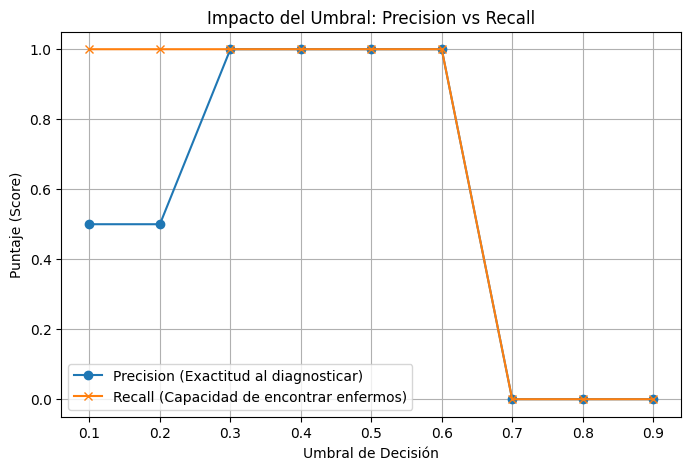

In [ ]:

df_res = pd.DataFrame(datos_resultados)
plt.figure(figsize=(8, 5))
plt.plot(df_res['Umbral'], df_res['Precision'], label='Precision (Exactitud al diagnosticar)', marker='o')
plt.plot(df_res['Umbral'], df_res['Recall'], label='Recall (Capacidad de encontrar enfermos)', marker='x')
plt.xlabel('Umbral de Decisión')
plt.ylabel('Puntaje (Score)')
plt.title('Impacto del Umbral: Precision vs Recall')
plt.legend()
plt.grid(True)
plt.show()

Observamos que de 0.10 y 0.20, el modelo tiene menos exigencias y asume que todos tienen diabetes.
Observamos que para el umbral de 0.30 a 0.60, es donde Tenemos mejores resultados, lo suficientemente alto para no confundir al paciente sano, pero lo suficientemente bajo para detectar al enfermo.
De 0.70 a 0.90 Todo cae a 0, por lo que el modelo es muy exigente y para el modelo nadie tiene diabetes.

# 3. Aprendizaje Supervisado (general)

## Ejercicio 5: Clasificación de imágenes simples
Dataset de imágenes de frutas (manzana / banana / naranja).

Tareas:
- Extraer características simples (color promedio, tamaño, relación de aspecto).
- Entrenar un SVM o árbol de decisión.
- Comparar desempeño entre ambos modelos.
- Realizar validación cruzada k-fold.

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

def extraer_features(ruta_imagen):
    try:
        img = Image.open(ruta_imagen).convert('RGB')
        arr = np.array(img)
        gray = img.convert('L')
        matriz_gray = np.array(gray)
        mask = matriz_gray < 240
        if np.sum(mask) == 0: return None

        r = arr[:,:,0][mask].mean()
        g = arr[:,:,1][mask].mean()
        b = arr[:,:,2][mask].mean()
        area = np.sum(mask)

        img_binaria = gray.point(lambda x: 0 if x > 240 else 255, '1')
        bbox = img_binaria.getbbox()
        if bbox:
            ratio = (bbox[2] - bbox[0]) / (bbox[3] - bbox[1])
        else:
            ratio = 0

        return [r, g, b, area, ratio]
    except:
        return None

def cargar_dataset_desde_carpeta(ruta_raiz):
    datos = []
    clases = ["Apple", "Banana", "Orange"] 

    print(f"Cargando datos desde: {ruta_raiz} ...")

    for clase in clases:
        ruta_clase = os.path.join(ruta_raiz, clase)
        if not os.path.exists(ruta_clase):
            print(f"Advertencia: No existe {ruta_clase}")
            continue

        for archivo in os.listdir(ruta_clase):
            if archivo.lower().endswith(('.png', '.jpg', '.jpeg')):
                ruta_completa = os.path.join(ruta_clase, archivo)
                feats = extraer_features(ruta_completa)
                if feats:
                    feats.append(clase)
                    datos.append(feats)

    return pd.DataFrame(datos, columns=["Rojo", "Verde", "Azul", "Area", "Aspecto", "Etiqueta"])

In [ ]:




df_train = cargar_dataset_desde_carpeta("Datasets/frutas/Training")

df_test = cargar_dataset_desde_carpeta("Datasets/frutas/Test")

print(f"\nResumen: {len(df_train)} datos de entrenamiento y {len(df_test)} datos de prueba.")

X_train = df_train.drop("Etiqueta", axis=1)
y_train = df_train["Etiqueta"]

X_test = df_test.drop("Etiqueta", axis=1)
y_test = df_test["Etiqueta"]

Cargando datos desde: Datasets/frutas/Training ...
Cargando datos desde: Datasets/frutas/Test ...

Resumen: 1413 datos de entrenamiento y 474 datos de prueba.


,Rojo,Verde,Azul,Area,Aspecto
0,101.596686,39.292652,35.699127,7907,1.020408
1,107.976915,41.106545,37.093607,7884,1.020408
2,133.484740,55.151937,42.972532,7536,1.086957
3,108.338261,41.353045,37.195476,7914,1.020408
4,109.549337,41.764661,37.649031,7844,1.020408


In [ ]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

# Modelo SVM
print("\n--- Evaluando SVM con datos de carpeta Test ---")
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
pred_svm = svm.predict(X_test_scaled)
print(classification_report(y_test, pred_svm))

In [ ]:

# Modelo Árbol
print("\n--- Evaluando Árbol de Decisión con datos de carpeta Test ---")
arbol = DecisionTreeClassifier(max_depth=5)
arbol.fit(X_train, y_train)
pred_arbol = arbol.predict(X_test)
print(classification_report(y_test, pred_arbol))


--- Evaluando SVM con datos de carpeta Test ---
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00       148
      Banana       1.00      1.00      1.00       166
      Orange       1.00      1.00      1.00       160

    accuracy                           1.00       474
   macro avg       1.00      1.00      1.00       474
weighted avg       1.00      1.00      1.00       474


--- Evaluando Árbol de Decisión con datos de carpeta Test ---
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00       148
      Banana       1.00      1.00      1.00       166
      Orange       1.00      1.00      1.00       160

    accuracy                           1.00       474
   macro avg       1.00      1.00      1.00       474
weighted avg       1.00      1.00      1.00       474



In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

k_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores_svm = cross_val_score(svm, X_train_scaled, y_train, cv=k_folds, scoring='accuracy')

print("Resultados SVM:")
print(f"  Puntajes en cada fold: {scores_svm}")
print(f"  Promedio:              {scores_svm.mean():.4f}")
print(f"  Desviacion Estandar:   {scores_svm.std():.4f}") 
print("-" * 30)


scores_arbol = cross_val_score(arbol, X_train, y_train, cv=k_folds, scoring='accuracy')

print("Resultados Arbol de Decision:")
print(f"  Puntajes en cada fold: {scores_arbol}")
print(f"  Promedio:              {scores_arbol.mean():.4f}")
print(f"  Desviacion Estandar:   {scores_arbol.std():.4f}")

--- Iniciando Validación Cruzada (k=5) ---

Resultados SVM:
  Puntajes en cada fold: [1. 1. 1. 1. 1.]
  Promedio:              1.0000
  Desviación Estándar:   0.0000
------------------------------
Resultados Árbol de Decisión:
  Puntajes en cada fold: [1. 1. 1. 1. 1.]
  Promedio:              1.0000
  Desviación Estándar:   0.0000


# Estrategias de Búsqueda (IA clásica)

## Ejercicio 6: Búsqueda no informada

1. Implementar BFS y DFS para recorrer un laberinto simple (matriz 10x10).
2. Comparar:
- nodos expandidos
- tiempo de ejecución
- si encuentra o no el camino más corto.

In [21]:
from time import time
laberinto = [
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
]
inicio = (0, 0)
meta = (9, 9)

In [ ]:
from collections import deque

def bfs_resolver_laberinto(laberinto, inicio, meta):
    filas = len(laberinto)
    cols = len(laberinto[0])
    
    
    
    cola = deque([(inicio, [inicio])])
    
    
    visitados = set()
    visitados.add(inicio)
    
    
    direcciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    while cola:
        
        (r_actual, c_actual), camino = cola.popleft()
        
        
        if (r_actual, c_actual) == meta:
            return camino
        
        
        for dr, dc in direcciones:
            nr, nc = r_actual + dr, c_actual + dc
            
            
            
            
            
            if (0 <= nr < filas and 0 <= nc < cols and 
                laberinto[nr][nc] == 0 and 
                (nr, nc) not in visitados):
                
                cola.append(((nr, nc), camino + [(nr, nc)]))
                visitados.add((nr, nc))
                
    return None 



inicio_tiempo = time()
camino_solucion = bfs_resolver_laberinto(laberinto, inicio, meta)
print(f"Tiempo de ejecución: {time() - inicio_tiempo:.4f} segundos")

if camino_solucion:
    print(f"¡Camino encontrado! Longitud: {len(camino_solucion)} pasos.")
    print(f"Ruta: {camino_solucion}")
    
    
    print("\n--- Visualización del Camino ---")
    for r in range(len(laberinto)):
        fila_str = ""
        for c in range(len(laberinto[0])):
            if (r, c) == inicio:
                fila_str += "S " 
            elif (r, c) == meta:
                fila_str += "E " 
            elif (r, c) in camino_solucion:
                fila_str += "* " 
            elif laberinto[r][c] == 1:
                fila_str += "█ " 
            else:
                fila_str += ". " 
        print(fila_str)
else:
    print("No existe un camino posible.")

Tiempo de ejecución: 0.0004 segundos
¡Camino encontrado! Longitud: 19 pasos.
Ruta: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (7, 2), (8, 2), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]

--- Visualización del Camino ---
S . . . █ . . . . . 
* █ █ . █ . █ . █ . 
* █ . . . . █ . █ . 
* █ . █ █ █ █ . █ . 
* . . . . . . . . . 
* █ █ █ █ █ . █ █ . 
* * * █ . . . . . . 
. █ * █ . █ █ █ █ . 
. █ * . . . . . █ . 
. █ * * * * * * * E 


In [ ]:
import sys

sys.setrecursionlimit(2000)

def dfs_con_rastro(laberinto, actual, meta, visitados, padres):
    
    if actual == meta:
        return True 
    
    r, c = actual
    visitados.add(actual)
    
    
    direcciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    for dr, dc in direcciones:
        nr, nc = r + dr, c + dc
        vecino = (nr, nc)
        
        
        if (0 <= nr < len(laberinto) and 
            0 <= nc < len(laberinto[0]) and 
            laberinto[nr][nc] == 0 and 
            vecino not in visitados):
            
            
            
            padres[vecino] = actual
            
            
            if dfs_con_rastro(laberinto, vecino, meta, visitados, padres):
                return True 
                
    return False 

def reconstruir_camino(padres, inicio, meta):
    
    camino = []
    actual = meta
    
    
    if actual not in padres and actual != inicio:
        return []
    
    while actual != inicio:
        camino.append(actual)
        actual = padres[actual] 
    
    camino.append(inicio)
    camino.reverse() 
    return camino

visitados = set()
padres = {} 


inicio_tiempo = time()
encontrado = dfs_con_rastro(laberinto, inicio, meta, visitados, padres)
print(f"Tiempo de ejecución: {time() - inicio_tiempo:.4f} segundos")
if encontrado:
    camino = reconstruir_camino(padres, inicio, meta)
    print(f"¡Camino encontrado! Longitud: {len(camino)}")
    print(camino)
    
    
    print("\n--- Mapa ---")
    for r in range(10):
        s = ""
        for c in range(10):
            if (r,c) in camino: s += "* "
            elif laberinto[r][c] == 1: s += "█ "
            else: s += ". "
        print(s)
else:
    print("No hay camino")

Tiempo de ejecución: 0.0006 segundos
¡Camino encontrado! Longitud: 45
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (7, 2), (8, 2), (9, 2), (9, 3), (8, 3), (8, 4), (7, 4), (6, 4), (6, 5), (6, 6), (5, 6), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (3, 2), (2, 2), (2, 3), (2, 4), (2, 5), (1, 5), (0, 5), (0, 6), (0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]

--- Mapa ---
* . . . █ * * * . . 
* █ █ . █ * █ * █ . 
* █ * * * * █ * █ . 
* █ * █ █ █ █ * █ . 
* . * * * * * * * * 
* █ █ █ █ █ * █ █ * 
* * * █ * * * . . * 
. █ * █ * █ █ █ █ * 
. █ * * * . . . █ * 
. █ * * . . . . . * 


## Observamos que el algoritmo bfs es el mas eficiente pues encuentra el camino en menos pasos, ademas de encontrar el camino mas corto, caso contrario el algoritmo dfs toma mas tiempo y pasos para encontrar el camino y no encuentra el camino mas corto.

## Ejercicio 7: Búsqueda informada

Para un mapa con ciudades conectadas:

Tareas:

- Implementar A*
- Definir dos heurísticas distintas (ej.: distancia euclidiana y Manhattan).
- Comparar eficiencia entre heurísticas.
- Visualizar la ruta óptima en un gráfico.

Calculando ruta de Santa Cruz a Oruro...
Ruta Euclidiana (695.0 km): ['Santa Cruz', 'Cochabamba', 'Oruro']
Ruta Manhattan (695.0 km): ['Santa Cruz', 'Cochabamba', 'Oruro']


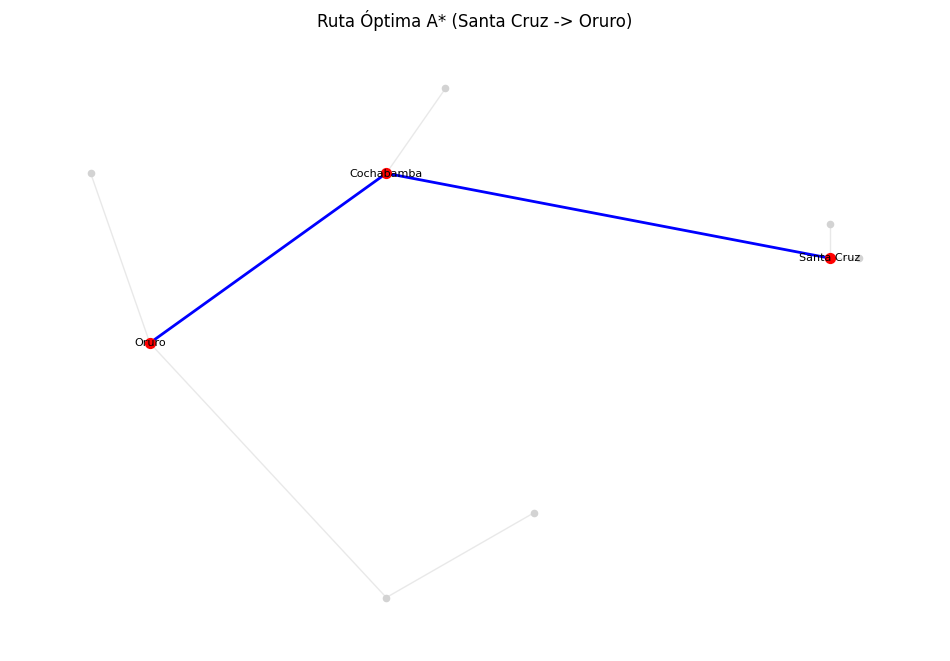

In [ ]:
import heapq
import math
import matplotlib.pyplot as plt
import networkx as nx



coordenadas = {
    'Cobija': (10, 90), 'Riberalta': (15, 88), 'Guayaramerin': (18, 89),
    'Reyes': (12, 70), 'Rurrenabaque': (12, 68), 'San Borja': (13, 65),
    'Trinidad': (25, 70), 'San Ignacio de Moxos': (22, 68),
    'La Paz': (10, 50), 'El Alto': (9, 50), 'Viacha': (9, 48), 'Coroico': (11, 52),
    'Oruro': (12, 40), 'Caracollo': (12, 42), 'Huanuni': (13, 38),
    'Cochabamba': (20, 50), 'Sacaba': (21, 50), 'Quillacollo': (19, 50), 'Villa Tunari': (22, 55),
    'Santa Cruz': (35, 45), 'Warnes': (35, 47), 'Montero': (35, 49), 'Cotoca': (36, 45), 'Yapacani': (30, 48),
    'Sucre': (25, 30), 'Potosi': (20, 25), 'Uyuni': (15, 20),
    'Tarija': (28, 15), 'Villazon': (20, 5), 'Yacuiba': (35, 10),
    
}


def cargar_grafo_desde_texto(texto_dataset):
    grafo = {}
    lineas = texto_dataset.strip().split('\n')
    
    for linea in lineas:
        if not linea.strip(): continue 
        
        partes = linea.split(';')
        origen, destino = partes[0].strip(), partes[1].strip()
        distancia = float(partes[2])
        
        
        if origen not in grafo: grafo[origen] = []
        if destino not in grafo: grafo[destino] = []
        
        
        grafo[origen].append((destino, distancia))
        grafo[destino].append((origen, distancia)) 
        
    return grafo


def obtener_coords(ciudad):
    
    
    return coordenadas.get(ciudad, (0, 0))

def heuristica_euclidiana(ciudad_a, ciudad_b):
    x1, y1 = obtener_coords(ciudad_a)
    x2, y2 = obtener_coords(ciudad_b)
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def heuristica_manhattan(ciudad_a, ciudad_b):
    x1, y1 = obtener_coords(ciudad_a)
    x2, y2 = obtener_coords(ciudad_b)
    return abs(x1 - x2) + abs(y1 - y2)


def a_star(grafo, inicio, meta, funcion_heuristica):
    
    cola = [(0, 0, inicio, [inicio])]
    visitados = set()
    costos_g = {inicio: 0} 
    
    while cola:
        f, g, actual, camino = heapq.heappop(cola)
        
        if actual == meta:
            return camino, g 
        
        if actual in visitados:
            continue
        visitados.add(actual)
        
        
        if actual in grafo:
            for vecino, peso_arista in grafo[actual]:
                nuevo_g = g + peso_arista
                
                
                if vecino not in costos_g or nuevo_g < costos_g[vecino]:
                    costos_g[vecino] = nuevo_g
                    h = funcion_heuristica(vecino, meta)
                    f = nuevo_g + h 
                    heapq.heappush(cola, (f, nuevo_g, vecino, camino + [vecino]))
                    
    return None, 0


def visualizar_ruta(grafo, camino, titulo):
    G = nx.Graph()
    
    
    for origen, conexiones in grafo.items():
        for destino, peso in conexiones:
            G.add_edge(origen, destino, weight=peso)
    
    
    pos = {}
    for nodo in G.nodes():
        if nodo in coordenadas:
            
            pos[nodo] = coordenadas[nodo]
        else:
            
            pos[nodo] = (25, 50) 

    plt.figure(figsize=(12, 8))
    
    
    nx.draw_networkx_edges(G, pos, edge_color='lightgray', alpha=0.5)
    nx.draw_networkx_nodes(G, pos, node_size=20, node_color='lightgray')
    
    
    ruta_edges = list(zip(camino, camino[1:]))
    nx.draw_networkx_nodes(G, pos, nodelist=camino, node_color='red', node_size=50)
    nx.draw_networkx_edges(G, pos, edgelist=ruta_edges, edge_color='blue', width=2)
        
    etiquetas = {nodo: nodo for nodo in camino}
    nx.draw_networkx_labels(G, pos, labels=etiquetas, font_size=8, font_color='black')
    
    plt.title(titulo)
    plt.axis('off')
    plt.show()


dataset_raw = """
Santa Cruz;Warnes;33;6.6
Warnes;Santa Cruz;33;6.6
Santa Cruz;Cotoca;24;5
Cochabamba;Villa Tunari;160;30
Santa Cruz;Cochabamba;480;100
La Paz;Oruro;230;40
Oruro;Cochabamba;215;35
Sucre;Potosi;155;25
Potosi;Oruro;310;50
""" 


grafo = cargar_grafo_desde_texto(dataset_raw)


inicio = "Santa Cruz"
meta = "Oruro"

print(f"Calculando ruta de {inicio} a {meta}...")


camino_euc, dist_euc = a_star(grafo, inicio, meta, heuristica_euclidiana)
print(f"Ruta Euclidiana ({dist_euc} km): {camino_euc}")


camino_man, dist_man = a_star(grafo, inicio, meta, heuristica_manhattan)
print(f"Ruta Manhattan ({dist_man} km): {camino_man}")


if camino_euc:
    visualizar_ruta(grafo, camino_euc, f"Ruta Óptima A* ({inicio} -> {meta})")

## Ejercicio 8: Juego del 8-puzzle

Tareas:

- Resolverlo con búsqueda A*.
- Probar con la heurística “número de piezas fuera de lugar” y “distancia Manhattan”.
- Comparar nodos generados y tiempo.

In [1]:
import heapq
import time
import math

class PuzzleNode:
    def __init__(self, state, parent=None, move=None, g=0, h=0):
        self.state = state 
        self.parent = parent
        self.move = move    
        self.g = g          
        self.h = h          
        self.f = g + h      



    def __lt__(self, other):
        if self.f == other.f:
            return self.h < other.h
        return self.f < other.f

    def __eq__(self, other):
        return self.state == other.state

    def __hash__(self):
        return hash(self.state)

def get_neighbors(state):
    neighbors = []

    index_zero = state.index(0)
    row, col = divmod(index_zero, 3)
    

    moves = {
        'Arriba': -3, 
        'Abajo': 3, 
        'Izquierda': -1, 
        'Derecha': 1
    }
    
    for action, change in moves.items():
    
        if action == 'Arriba' and row == 0: continue
        if action == 'Abajo' and row == 2: continue
        if action == 'Izquierda' and col == 0: continue
        if action == 'Derecha' and col == 2: continue
        
    
        new_state = list(state)
        target_idx = index_zero + change
        new_state[index_zero], new_state[target_idx] = new_state[target_idx], new_state[index_zero]
        neighbors.append((tuple(new_state), action))
        
    return neighbors


def h1_piezas_fuera(state, goal):    
    count = 0
    for i in range(9):
        if state[i] != 0 and state[i] != goal[i]:
            count += 1
    return count

def h2_distancia_manhattan(state, goal):    
    distance = 0
    for i in range(9):
        tile = state[i]
        if tile != 0:
        
            current_row, current_col = divmod(i, 3)
        
            target_idx = goal.index(tile)
            target_row, target_col = divmod(target_idx, 3)
        
            distance += abs(current_row - target_row) + abs(current_col - target_col)
    return distance

def resolver_puzzle(start_state, goal_state, heuristic_func):
    start_time = time.time()
    

    open_list = []
    initial_h = heuristic_func(start_state, goal_state)
    start_node = PuzzleNode(start_state, None, None, 0, initial_h)
    heapq.heappush(open_list, start_node)
    

    visited = set()
    
    nodes_generated = 0
    
    while open_list:
        current_node = heapq.heappop(open_list)
        
    
        if current_node.state == goal_state:
            end_time = time.time()
        
            path = []
            curr = current_node
            while curr.parent:
                path.append(curr.move)
                curr = curr.parent
            return path[::-1], nodes_generated, end_time - start_time
        
        visited.add(current_node.state)
        
    
        for neighbor_state, move in get_neighbors(current_node.state):
            nodes_generated += 1
            if neighbor_state in visited:
                continue
                
            g_new = current_node.g + 1
            h_new = heuristic_func(neighbor_state, goal_state)
            new_node = PuzzleNode(neighbor_state, current_node, move, g_new, h_new)
            
        
        
            heapq.heappush(open_list, new_node)
            
    return None, nodes_generated, 0


goal_state = (0, 1, 2, 3, 4, 5, 6, 7, 8)

initial_state = (3, 1, 2, 0, 4, 5, 6, 7, 8) 

print(f"Estado Inicial: {initial_state}")
print(f"Estado Meta:    {goal_state}")
print("-" * 50)

path_h1, nodes_h1, time_h1 = resolver_puzzle(initial_state, goal_state, h1_piezas_fuera)
print(f"1. Heurística: Piezas Fuera de Lugar")
print(f"   - Pasos Solución: {len(path_h1)}")
print(f"   - Nodos Generados: {nodes_h1}")
print(f"   - Tiempo: {time_h1:.5f} seg")

path_h2, nodes_h2, time_h2 = resolver_puzzle(initial_state, goal_state, h2_distancia_manhattan)
print(f"\n2. Heurística: Distancia Manhattan")
print(f"   - Pasos Solución: {len(path_h2)}")
print(f"   - Nodos Generados: {nodes_h2}")
print(f"   - Tiempo: {time_h2:.5f} seg")

print("-" * 50)
print("COMPARACION:")
if nodes_h2 < nodes_h1:
    print("Manhattan fue mas eficiente (exploró menos nodos).")
else:
    print("Piezas fuera de lugar fue más eficiente.")
    
print(f"\nCamino encontrado (Manhattan): {path_h2}")

Estado Inicial: (3, 1, 2, 0, 4, 5, 6, 7, 8)
Estado Meta:    (0, 1, 2, 3, 4, 5, 6, 7, 8)
--------------------------------------------------
1. Heurística: Piezas Fuera de Lugar
   - Pasos Solución: 1
   - Nodos Generados: 3
   - Tiempo: 0.00004 seg

2. Heurística: Distancia Manhattan
   - Pasos Solución: 1
   - Nodos Generados: 3
   - Tiempo: 0.00005 seg
--------------------------------------------------
COMPARACION:
Piezas fuera de lugar fue más eficiente.

Camino encontrado (Manhattan): ['Arriba']
